In [35]:
import numpy as np
import cv2

def pad_image(image, pad_width):
    """Pad the image with zeros."""
    padded_image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width)), 'constant', constant_values=0)
    return padded_image

def apply_filter(image, kernel):
    """Apply filter to each pixel of the image."""
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_width = kernel_width // 2
    
    padded_image = pad_image(image, pad_width)
    
    filtered_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            patch = padded_image[i:i+kernel_height, j:j+kernel_width]
            filtered_pixel = np.sum(patch * kernel)
            filtered_image[i, j] = filtered_pixel
            
    return filtered_image

# Input image from the user
image_path ='sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Normalize the kernel
kernel = kernel / np.sum(np.abs(kernel))

# Apply the filter
filtered_image = apply_filter(image, kernel)
print("linear_spatial_Filtered Image:")
print(filtered_image)

# Display images
cv2.imshow('Original Image', image)
cv2.imshow('linear_spatial_Filtered Image', filtered_image.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()


linear_spatial_Filtered Image:
[[220   0   0 ...   0   0  34]
 [201   0   0 ...   0   1  52]
 [201   0   0 ...   0   0  52]
 ...
 [206 254 253 ...   9   9  29]
 [207 254 253 ...   7   7  32]
 [223 255 255 ...   2   3  23]]


In [29]:
import numpy as np
import cv2

def spatial_correlation(image, kernel):
    """Compute spatial correlation."""
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_width = kernel_width // 2
    
    correlated_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            # Extract the patch from the image
            i_start = max(i - pad_width, 0)
            i_end = min(i + pad_width + 1, height)
            j_start = max(j - pad_width, 0)
            j_end = min(j + pad_width + 1, width)
            
            patch = image[i_start:i_end, j_start:j_end]
            
            # Apply the kernel to the patch
            kernel_patch = kernel[pad_width - (i - i_start):pad_width + (i_end - i), 
                                  pad_width - (j - j_start):pad_width + (j_end - j)]
            
            correlated_image[i, j] = np.sum(patch * kernel_patch)
            
    return correlated_image

def spatial_convolution(image, kernel):
    """Compute spatial convolution."""
    flipped_kernel = np.flipud(np.fliplr(kernel))
    convolved_image = spatial_correlation(image, flipped_kernel)
    return convolved_image

# Input image from the user
image_path ='sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Normalize the kernel
kernel = kernel / np.sum(np.abs(kernel))

# Compute spatial correlation
correlated_image = spatial_correlation(image, kernel)
print("Correlated Image:")
print(correlated_image)

# Compute spatial convolution
convolved_image = spatial_convolution(image, kernel)
print("\nConvolved Image:")
print(convolved_image)

# Display images
cv2.imshow('Original Image', image)
cv2.imshow('Correlated Image', correlated_image.astype(np.uint8))
cv2.imshow('Convolved Image', convolved_image.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()


Correlated Image:
[[220   0   0 ...   0   0  34]
 [201   0   0 ...   0   1  52]
 [201   0   0 ...   0   0  52]
 ...
 [206 254 253 ...   9   9  29]
 [207 254 253 ...   7   7  32]
 [223 255 255 ...   2   3  23]]

Convolved Image:
[[ 36   0   0 ...   0   0 222]
 [ 55   0   0 ...   0 255 204]
 [ 55   0   0 ...   0   0 204]
 ...
 [ 50   2   3 ... 247 247 227]
 [ 49   2   3 ... 249 249 224]
 [ 33   1   1 ... 254 253 233]]


In [34]:
#for gray image
import numpy as np
import cv2

def apply_average_filter(image, kernel_size):
    """Apply average filter to the image."""
    height, width = image.shape
    pad_width = kernel_size // 2
    
    filtered_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            i_start = max(i - pad_width, 0)
            i_end = min(i + pad_width + 1, height)
            j_start = max(j - pad_width, 0)
            j_end = min(j + pad_width + 1, width)
            
            patch = image[i_start:i_end, j_start:j_end]
            
            filtered_image[i, j] = np.mean(patch)
            
    return filtered_image

def apply_max_filter(image, kernel_size):
    """Apply max filter to the image."""
    height, width = image.shape
    pad_width = kernel_size // 2
    
    filtered_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            i_start = max(i - pad_width, 0)
            i_end = min(i + pad_width + 1, height)
            j_start = max(j - pad_width, 0)
            j_end = min(j + pad_width + 1, width)
            
            patch = image[i_start:i_end, j_start:j_end]
            
            filtered_image[i, j] = np.max(patch)
            
    return filtered_image

def apply_min_filter(image, kernel_size):
    """Apply min filter to the image."""
    height, width = image.shape
    pad_width = kernel_size // 2
    
    filtered_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            i_start = max(i - pad_width, 0)
            i_end = min(i + pad_width + 1, height)
            j_start = max(j - pad_width, 0)
            j_end = min(j + pad_width + 1, width)
            
            patch = image[i_start:i_end, j_start:j_end]
            
            filtered_image[i, j] = np.min(patch)
            
    return filtered_image

# Input image from the user
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the kernel size
kernel_size = 3

# Apply average filter
average_filtered_image = apply_average_filter(image, kernel_size)
print("Average Filtered Image:")
print(average_filtered_image)

# Apply max filter
max_filtered_image = apply_max_filter(image, kernel_size)
print("\nMax Filtered Image:")
print(max_filtered_image)

# Apply min filter
min_filtered_image = apply_min_filter(image, kernel_size)
print("\nMin Filtered Image:")
print(min_filtered_image)

# Display images
cv2.imshow('Original Image', image)
cv2.imshow('Average Filtered Image', average_filtered_image.astype(np.uint8))
cv2.imshow('Max Filtered Image', max_filtered_image.astype(np.uint8))
cv2.imshow('Min Filtered Image', min_filtered_image.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()


Average Filtered Image:
[[110 110 110 ... 104 104 103]
 [110 110 110 ... 104 104 103]
 [110 110 110 ... 103 103 103]
 ...
 [100 101 104 ...  68  58  53]
 [ 99 100 103 ...  71  63  60]
 [ 99 100 102 ...  74  69  67]]

Max Filtered Image:
[[110 110 110 ... 106 106 105]
 [110 110 110 ... 106 106 105]
 [110 110 110 ... 105 105 104]
 ...
 [103 107 110 ...  87  80  74]
 [100 104 107 ...  87  80  74]
 [100 103 106 ...  87  80  74]]

Min Filtered Image:
[[110 110 110 ... 104 102 102]
 [110 110 110 ... 104 102 102]
 [110 110 110 ... 102 102 102]
 ...
 [ 98  98 100 ...  52  39  39]
 [ 98  98 100 ...  52  40  40]
 [ 98  98 100 ...  67  61  61]]


In [24]:
import numpy as np
import cv2

def apply_average_filter(image, kernel_size):
    """Apply average filter to the image."""
    height, width, channels = image.shape
    pad_width = kernel_size // 2
    
    filtered_image = np.zeros_like(image)
    
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                i_start = max(i - pad_width, 0)
                i_end = min(i + pad_width + 1, height)
                j_start = max(j - pad_width, 0)
                j_end = min(j + pad_width + 1, width)
                
                patch = image[i_start:i_end, j_start:j_end, c]
                
                filtered_image[i, j, c] = np.mean(patch)
                
    return filtered_image

def apply_max_filter(image, kernel_size):
    """Apply max filter to the image."""
    height, width, channels = image.shape
    pad_width = kernel_size // 2
    
    filtered_image = np.zeros_like(image)
    
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                i_start = max(i - pad_width, 0)
                i_end = min(i + pad_width + 1, height)
                j_start = max(j - pad_width, 0)
                j_end = min(j + pad_width + 1, width)
                
                patch = image[i_start:i_end, j_start:j_end, c]
                
                filtered_image[i, j, c] = np.max(patch)
                
    return filtered_image

def apply_min_filter(image, kernel_size):
    """Apply min filter to the image."""
    height, width, channels = image.shape
    pad_width = kernel_size // 2
    
    filtered_image = np.zeros_like(image)
    
    for c in range(channels):
        for i in range(height):
            for j in range(width):
                i_start = max(i - pad_width, 0)
                i_end = min(i + pad_width + 1, height)
                j_start = max(j - pad_width, 0)
                j_end = min(j + pad_width + 1, width)
                
                patch = image[i_start:i_end, j_start:j_end, c]
                
                filtered_image[i, j, c] = np.min(patch)
                
    return filtered_image

# Input image from the user
image_path ='sunflower.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not open the image.")
    exit()

# Convert the image to RGB (OpenCV loads images in BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the kernel size
kernel_size = 3

# Apply average filter
average_filtered_image = apply_average_filter(image, kernel_size)
print("Average Filtered Image:")
print(average_filtered_image)

# Apply max filter
max_filtered_image = apply_max_filter(image, kernel_size)
print("\nMax Filtered Image:")
print(max_filtered_image)

# Apply min filter
min_filtered_image = apply_min_filter(image, kernel_size)
print("\nMin Filtered Image:")
print(min_filtered_image)

# Display images
cv2.imshow('Original Image', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
cv2.imshow('Average Filtered Image', cv2.cvtColor(average_filtered_image, cv2.COLOR_RGB2BGR))
cv2.imshow('Max Filtered Image', cv2.cvtColor(max_filtered_image, cv2.COLOR_RGB2BGR))
cv2.imshow('Min Filtered Image', cv2.cvtColor(min_filtered_image, cv2.COLOR_RGB2BGR))

cv2.waitKey(0)
cv2.destroyAllWindows()


Average Filtered Image:
[[[ 65 115 202]
  [ 65 115 202]
  [ 65 115 202]
  ...
  [ 84 123  56]
  [ 84 123  56]
  [ 83 122  55]]

 [[ 65 115 202]
  [ 65 115 202]
  [ 65 115 202]
  ...
  [ 84 123  57]
  [ 84 123  56]
  [ 83 122  56]]

 [[ 65 115 202]
  [ 65 115 202]
  [ 65 115 202]
  ...
  [ 83 122  57]
  [ 83 122  57]
  [ 83 122  56]]

 ...

 [[ 89 116  48]
  [ 90 117  50]
  [ 92 120  53]
  ...
  [ 60  81  23]
  [ 50  70  16]
  [ 45  66  13]]

 [[ 88 115  48]
  [ 89 116  49]
  [ 91 118  52]
  ...
  [ 64  82  27]
  [ 56  74  22]
  [ 53  71  20]]

 [[ 88 115  48]
  [ 89 116  49]
  [ 91 118  52]
  ...
  [ 68  85  31]
  [ 63  80  29]
  [ 61  77  28]]]

Max Filtered Image:
[[[ 65 115 202]
  [ 65 115 202]
  [ 65 115 202]
  ...
  [ 86 125  58]
  [ 86 125  58]
  [ 85 124  57]]

 [[ 65 115 202]
  [ 65 115 202]
  [ 65 115 202]
  ...
  [ 86 125  59]
  [ 86 125  59]
  [ 85 124  58]]

 [[ 65 115 202]
  [ 65 115 202]
  [ 65 115 202]
  ...
  [ 85 124  59]
  [ 85 124  59]
  [ 84 123  58]]

 ...

 [[ 92 

In [25]:
#
import numpy as np
import cv2

def apply_first_order_derivative_sharpening(image):
    """Apply first-order derivative sharpening filter to the image."""
    kernel_x = np.array([[0, 0, 0],
                         [-1, 1, 0],
                         [0, 0, 0]])
    
    kernel_y = np.array([[0, -1, 0],
                         [0, 1, 0],
                         [0, 0, 0]])
    
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)
    
    sharpened_image = cv2.addWeighted(image, 1, gradient_x + gradient_y, 1, 0)
    
    return sharpened_image

def apply_second_order_derivative_sharpening(image):
    """Apply second-order derivative sharpening filter to the image."""
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    
    sharpened_image = cv2.filter2D(image, -1, kernel)
    
    return sharpened_image

# Input image from the user
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not open the image.")
    exit()

# Apply first-order derivative sharpening
first_order_sharpened_image = apply_first_order_derivative_sharpening(image)
print("First-Order Derivative Sharpened Image:")

# Apply second-order derivative sharpening
second_order_sharpened_image = apply_second_order_derivative_sharpening(image)
print("\nSecond-Order Derivative Sharpened Image:")

# Display images
cv2.imshow('Original Image', image)
cv2.imshow('First-Order Derivative Sharpened Image', first_order_sharpened_image)
cv2.imshow('Second-Order Derivative Sharpened Image', second_order_sharpened_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


First-Order Derivative Sharpened Image:

Second-Order Derivative Sharpened Image:


In [26]:
import numpy as np
import cv2

def apply_sobel_filter(image):
    """Apply Sobel filter to the image."""
    # Define Sobel kernels
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    
    kernel_y = np.array([[-1, -2, -1],
                         [0, 0, 0],
                         [1, 2, 1]])
    
    # Apply Sobel kernels
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)
    
    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(np.square(gradient_x) + np.square(gradient_y))
    
    # Normalize gradient magnitude
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
    
    return gradient_magnitude.astype(np.uint8)

# Input image from the user
image_path ='sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not open the image.")
    exit()

# Apply Sobel filter
sobel_filtered_image = apply_sobel_filter(image)
print("Sobel Filtered Image:")

# Display images
cv2.imshow('Original Image', image)
cv2.imshow('Sobel Filtered Image', sobel_filtered_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


Sobel Filtered Image:


In [27]:
import numpy as np
import cv2

def apply_gaussian_filter(image, kernel_size, sigma):
    """Apply Gaussian filter to the image."""
    # Create Gaussian kernel
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    
    # Apply Gaussian kernel
    filtered_image = cv2.filter2D(image, -1, kernel)
    
    return filtered_image

# Input image from the user
image_path ='sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not open the image.")
    exit()

# Define kernel size and sigma for Gaussian filter
kernel_size = 5
sigma = 1.0

# Apply Gaussian filter
gaussian_filtered_image = apply_gaussian_filter(image, kernel_size, sigma)
print("Gaussian Filtered Image:")

# Display images
cv2.imshow('Original Image', image)
cv2.imshow('Gaussian Filtered Image', gaussian_filtered_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


Gaussian Filtered Image:


In [37]:
import numpy as np
import cv2

def spatial_correlation(image, kernel):
    """Compute spatial correlation."""
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_width = kernel_width // 2
    
    correlated_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            # Extract the patch from the image
            i_start = max(i - pad_width, 0)
            i_end = min(i + pad_width + 1, height)
            j_start = max(j - pad_width, 0)
            j_end = min(j + pad_width + 1, width)
            
            patch = image[i_start:i_end, j_start:j_end]
            
            # Apply the kernel to the patch
            kernel_patch = kernel[pad_width - (i - i_start):pad_width + (i_end - i), 
                                  pad_width - (j - j_start):pad_width + (j_end - j)]
            
            correlated_image[i, j] = np.sum(patch * kernel_patch)
            
    return correlated_image

def spatial_convolution(image, kernel):
    """Compute spatial convolution."""
    flipped_kernel = np.flipud(np.fliplr(kernel))
    convolved_image = spatial_correlation(image, flipped_kernel)
    return convolved_image

def linear_filter(image, kernel):
    """Apply linear filter to the image using spatial correlation."""
    filtered_image = spatial_correlation(image, kernel)
    return filtered_image

# Input image from the user
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not open the image.")
    exit()

# Define the kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Normalize the kernel
kernel = kernel / np.sum(np.abs(kernel))

# Compute spatial correlation
correlated_image = spatial_correlation(image, kernel)
print("Correlated Image:")
print(correlated_image)

# Compute spatial convolution
convolved_image = spatial_convolution(image, kernel)
print("\nConvolved Image:")
print(convolved_image)

# Apply linear filter
filtered_image = linear_filter(image, kernel)
print("\nFiltered Image:")

# Display images
cv2.imshow('Original Image', image)
cv2.imshow('Correlated Image', correlated_image.astype(np.uint8))
cv2.imshow('Convolved Image', convolved_image.astype(np.uint8))
cv2.imshow('Filtered Image', filtered_image.astype(np.uint8))

cv2.waitKey(0)
cv2.destroyAllWindows()


Correlated Image:
[[220   0   0 ...   0   0  34]
 [201   0   0 ...   0   1  52]
 [201   0   0 ...   0   0  52]
 ...
 [206 254 253 ...   9   9  29]
 [207 254 253 ...   7   7  32]
 [223 255 255 ...   2   3  23]]

Convolved Image:
[[ 36   0   0 ...   0   0 222]
 [ 55   0   0 ...   0 255 204]
 [ 55   0   0 ...   0   0 204]
 ...
 [ 50   2   3 ... 247 247 227]
 [ 49   2   3 ... 249 249 224]
 [ 33   1   1 ... 254 253 233]]

Filtered Image:


Correlated Image:
[[220   0   0 ...   0   0  34]
 [201   0   0 ...   0   1  52]
 [201   0   0 ...   0   0  52]
 ...
 [206 254 253 ...   9   9  29]
 [207 254 253 ...   7   7  32]
 [223 255 255 ...   2   3  23]]

Convolved Image:
[[ 36   0   0 ...   0   0 222]
 [ 55   0   0 ...   0 255 204]
 [ 55   0   0 ...   0   0 204]
 ...
 [ 50   2   3 ... 247 247 227]
 [ 49   2   3 ... 249 249 224]
 [ 33   1   1 ... 254 253 233]]

Filtered Image:


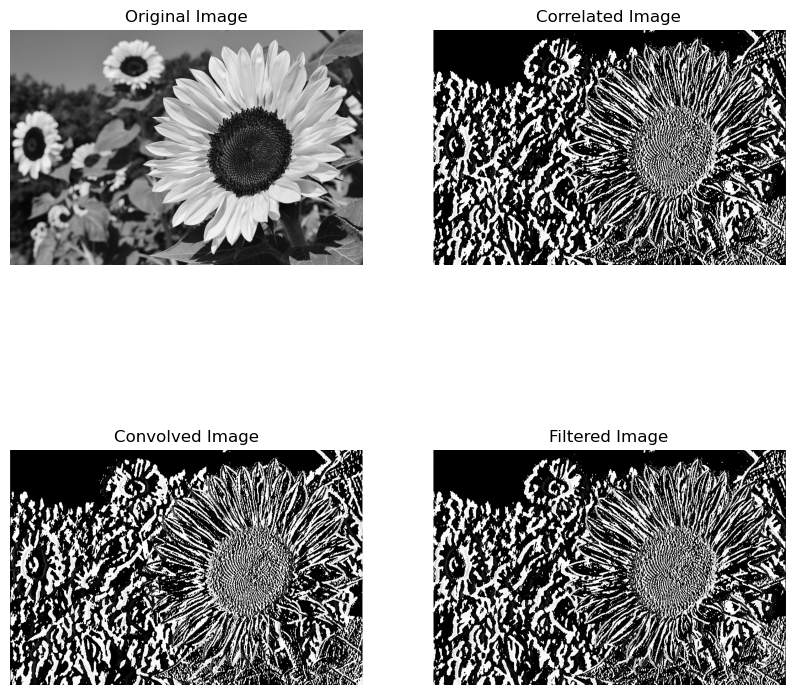

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def spatial_correlation(image, kernel):
    """Compute spatial correlation."""
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_width = kernel_width // 2
    
    correlated_image = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            # Extract the patch from the image
            i_start = max(i - pad_width, 0)
            i_end = min(i + pad_width + 1, height)
            j_start = max(j - pad_width, 0)
            j_end = min(j + pad_width + 1, width)
            
            patch = image[i_start:i_end, j_start:j_end]
            
            # Apply the kernel to the patch
            kernel_patch = kernel[pad_width - (i - i_start):pad_width + (i_end - i), 
                                  pad_width - (j - j_start):pad_width + (j_end - j)]
            
            correlated_image[i, j] = np.sum(patch * kernel_patch)
            
    return correlated_image

def spatial_convolution(image, kernel):
    """Compute spatial convolution."""
    flipped_kernel = np.flipud(np.fliplr(kernel))
    convolved_image = spatial_correlation(image, flipped_kernel)
    return convolved_image

def linear_filter(image, kernel):
    """Apply linear filter to the image using spatial correlation."""
    filtered_image = spatial_correlation(image, kernel)
    return filtered_image

# Input image from the user
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not open the image.")
    exit()

# Define the kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Normalize the kernel
kernel = kernel / np.sum(np.abs(kernel))

# Compute spatial correlation
correlated_image = spatial_correlation(image, kernel)
print("Correlated Image:")
print(correlated_image)

# Compute spatial convolution
convolved_image = spatial_convolution(image, kernel)
print("\nConvolved Image:")
print(convolved_image)

# Apply linear filter
filtered_image = linear_filter(image, kernel)
print("\nFiltered Image:")

# Display images using Matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(correlated_image, cmap='gray')
plt.title('Correlated Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()
